## Probabilistic programming 1: Assignment

Bayesian inference consists of specifying a likelihood function for the data, prior distributions for the unknown variables, and computing posterior distributions. In the first probabilistic programming session, we implemented likelihoods, priors and posteriors for the Beer Tasting experiment.

Below, I am going to show you a likelihood function and we're going to see how it changes as a function of data. If you're unfamiliar with the concept of a likelihood function, then I suggest having another look at the lecture on [Bayesian machine learning](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/Bayesian-Machine-Learning.ipynb) or the [Probabilistic Programming 1](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/probprog/Probabilistic-Programming-1.ipynb) session.

In [ ]:
using Pkg
Pkg.activate("workspace/")
Pkg.instantiate();

In [ ]:
using Plots

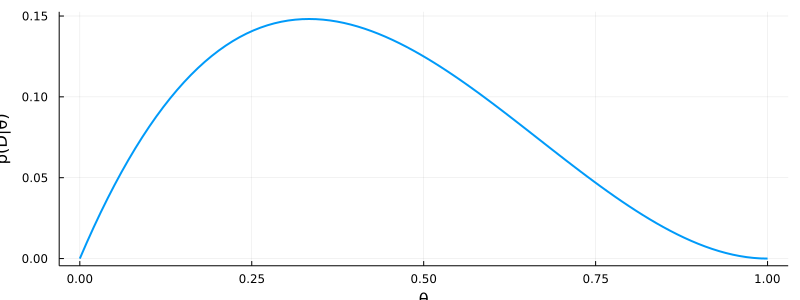

In [3]:
# Data set
D = [0 0 1]

# Range of parameters
θ = range(0, stop=1, length=100)

# Likelihood function
likelihood(D, θ) = θ.^(sum(D .== 1)) .* (1 .- θ).^(sum((1 .- D) .== 1))

# Plot likelihood
plot(θ, likelihood(D, θ), linewidth=2, label="", xlabel="θ", ylabel="p(D|θ)", size=(800,300))

### **1) What is the likelihood of $\theta = 0.5$?**

In [4]:
# Create a variable "answer_1" with your value for the likelihood

### BEGIN SOLUTION
answer_1 = likelihood(D, 0.5)
### END SOLUTION

# Print answer
println("1) Likelihood = "*string(answer_1))

1) Likelihood = 0.125


In [5]:
# This cell tests your answer
@assert typeof(answer_1) == Float64
### BEGIN HIDDEN TESTS
@assert abs(answer_1 - 0.125) < 1e-3
### END HIDDEN TESTS

Suppose we had more observations. These will reshape the likelihood, but also re-scale it.

### **2) Add the following data $[0\ 1\ 1]$ to your set and re-compute the likelihood of $\theta = 0.5$.**

In [6]:
# Create a variable "answer_2" with your value for the likelihood

### BEGIN SOLUTION
D = [0 0 1 0 1 1]

answer_2 = likelihood(D, 0.5)
### END SOLUTION

# Print answer
println("2) Likelihood = "*string(answer_2))

2) Likelihood = 0.015625


In [7]:
# This cell tests your answer
@assert typeof(answer_2) == Float64
### BEGIN HIDDEN TESTS
@assert abs(answer_2 - 0.015625) < 1e-4
### END HIDDEN TESTS

The likelihood seems to have gone down. Let's plot the likelihood function again, for the larger data set.

In [8]:
D = [0 0 1]
[D 0 1 1]

1×6 Matrix{Int64}:
 0  0  1  0  1  1

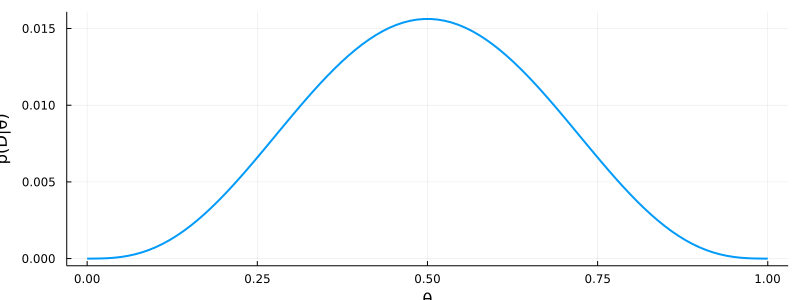

In [9]:
# Data set
D = [0 0 1 0 1 1]

# Plot likelihood
plot(θ, likelihood(D, θ), linewidth=2, label="", xlabel="θ", ylabel="p(D|θ)", size=(800,300))

The maximum of the likelihood function moved towards $0.5$, but the likelihood went down nonetheless. This happens because the scale of the function decreases as we add more data.

Say we add even more observations, namely $[1\ 1\ 1\ 1]$.

### **3) Which is bigger now: the likelihood of $\theta=0.5$ or of $\theta=0.8$?**

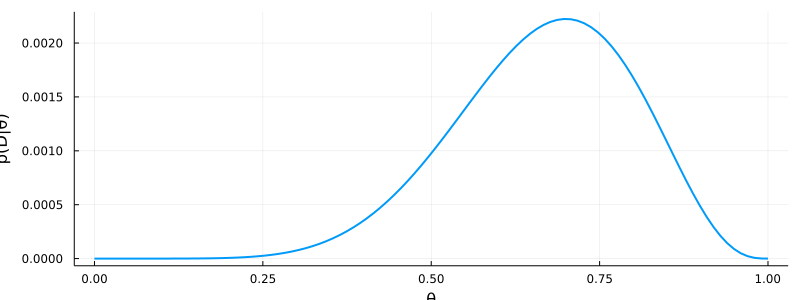

In [10]:
D = [0 0 1 0 1 1 1 1 1 1]

plot(θ, likelihood(D, θ), linewidth=2, label="", xlabel="θ", ylabel="p(D|θ)", size=(800,300))

In [11]:
# Create a variable "answer_3" with either 0.5 or 0.8 as your answer.

### BEGIN SOLUTION
D = [0 0 1 0 1 1 1 1 1 1]

plot(θ, likelihood(D, θ), linewidth=2, label="", xlabel="θ", ylabel="p(D|θ)")

if likelihood(D, 0.5) > likelihood(D, 0.8)
    answer_3 = 0.5
else
    answer_3 = 0.8
end
### END SOLUTION

# Print answer
println("The likelihood of θ = "*string(answer_3)*" is largest.")

The likelihood of θ = 0.8 is largest.


In [12]:
# This cell tests your answer
@assert typeof(answer_3) == Float64
### BEGIN HIDDEN TESTS
@assert answer_3 == 0.8
### END HIDDEN TESTS